In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#Importing datasets
ideal_data=pd.read_csv("/content/Hackathon_Ideal_Data.csv")
mapping_file=pd.read_csv("/content/Hackathon_Mapping_File.csv")
validation_data=pd.read_csv("/content/Hackathon_Validation_Data.csv")
working_data=pd.read_csv("/content/Hackathon_Working_Data.csv")
sample_submission=pd.read_csv("/content/Sample Submission.csv")
print(ideal_data.head())
print(mapping_file.head())
print(working_data.head())
print(sample_submission.head())



  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  
              File N

In [ ]:
#Handling missing data
print(ideal_data.isnull().sum())
is_any_missing_data=ideal_data.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)
ideal_data.dropna(axis=0, inplace=True)
ideal_data.dropna(axis=1, inplace=True)

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64
Are there any missing values?
False


In [ ]:
print(working_data.isnull().sum())
is_any_missing_data=working_data.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64
Are there any missing values?
False


In [ ]:
print(mapping_file.isnull().sum())
is_any_missing_data=mapping_file.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)
mapping_file.dropna(axis=0, inplace=True)
mapping_file.dropna(axis=1, inplace=True)

File Name             22
Column Name            0
Column Description     0
dtype: int64
Are there any missing values?
True


In [ ]:
print(sample_submission.isnull().sum())
is_any_missing_data=mapping_file.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)
sample_submission.dropna(axis=0, inplace=True)
sample_submission.dropna(axis=1, inplace=True)

ID            0
TOTALVALUE    0
dtype: int64
Are there any missing values?
False


In [ ]:
ideal_data.drop_duplicates(inplace=True)
ideal_data.duplicated().sum()

0

In [ ]:
working_data.drop_duplicates(inplace=True)
working_data.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
ideal_data_filled = imputer.fit_transform(ideal_data.select_dtypes(include=['int', 'float']))
ideal_data_filled = pd.DataFrame(ideal_data_filled, columns=ideal_data.select_dtypes(include=['int', 'float']).columns)

In [ ]:
# Data cleaning, normalization, and standardization
scaler = StandardScaler()
working_data_scaled = scaler.fit_transform(working_data.select_dtypes(include=['int', 'float']))
working_data_scaled = pd.DataFrame(working_data_scaled, columns=working_data.select_dtypes(include=['int', 'float']).columns)

In [ ]:
encoder = OneHotEncoder()
ideal_data_encoded = pd.get_dummies(ideal_data.select_dtypes(include=['object']))

# Concatenate numerical and encoded categorical features
ideal_data_preprocessed = pd.concat([ideal_data_filled, ideal_data_encoded], axis=1)

# Print preprocessed data
print("Ideal Data after preprocessing:")
print(ideal_data_preprocessed.head())
print("\nWorking Data after scaling:")
print(working_data_scaled.head())

Ideal Data after preprocessing:
    QTY  VALUE  MONTH_M1  MONTH_M2  MONTH_M3  STORECODE_P1  STORECODE_P10  \
0  25.0   83.0      True     False     False          True          False   
1   6.0   22.0      True     False     False          True          False   
2   4.0   15.0      True     False     False          True          False   
3  15.0   60.0      True     False     False          True          False   
4   0.0    0.0      True     False     False         False          False   

   STORECODE_P2  STORECODE_P3  STORECODE_P4  ...  BRD_ZANDU  BRD_ZANDU GEL  \
0         False         False         False  ...      False          False   
1         False         False         False  ...      False          False   
2         False         False         False  ...      False          False   
3         False         False         False  ...      False          False   
4          True         False         False  ...      False          False   

   BRD_ZANDU ULTRA POWER  BRD_ZATPAT

In [ ]:
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.245983,-0.099349,-0.032506,1.330044,2.023710
1,-1.245983,-0.339200,-0.032506,0.229519,0.495384
2,-1.245983,-0.496026,-0.032506,-0.490054,-0.503906
3,-1.245983,-0.315215,-0.032506,0.339572,0.648217
4,-1.245983,-0.479421,-0.032506,-0.413864,-0.398098


In [ ]:
numerical_variables = [feature for feature in ideal_data.columns if ideal_data[feature].dtypes!='O']
print('Number of numberical variables:', len(numerical_variables))

ideal_data[numerical_variables].sample(1)

Number of numberical variables: 2


,QTY,VALUE
1536,300,300


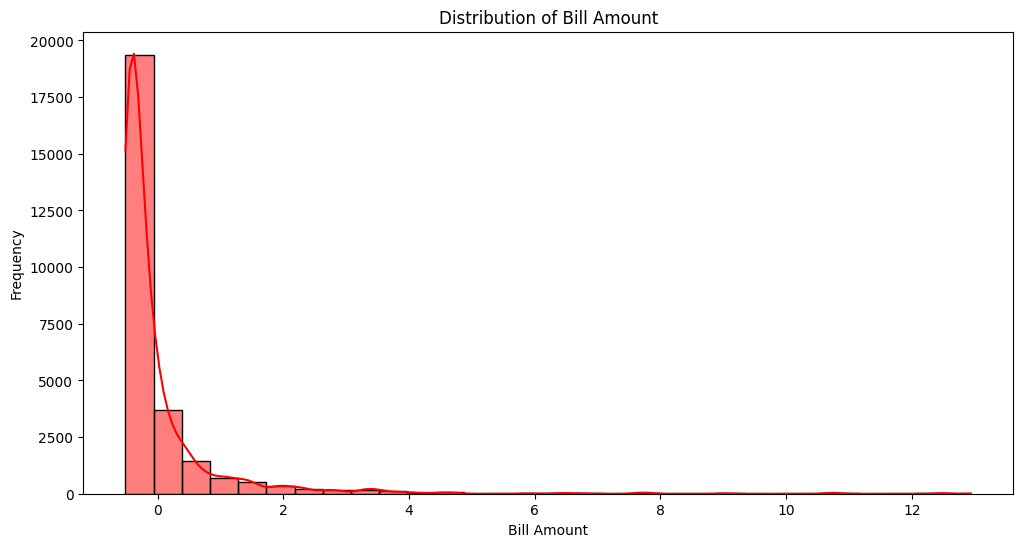

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(data=working_data_scaled['BILL_AMT'], bins=30, kde=True, color='red')
plt.title('Distribution of Bill Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.show()

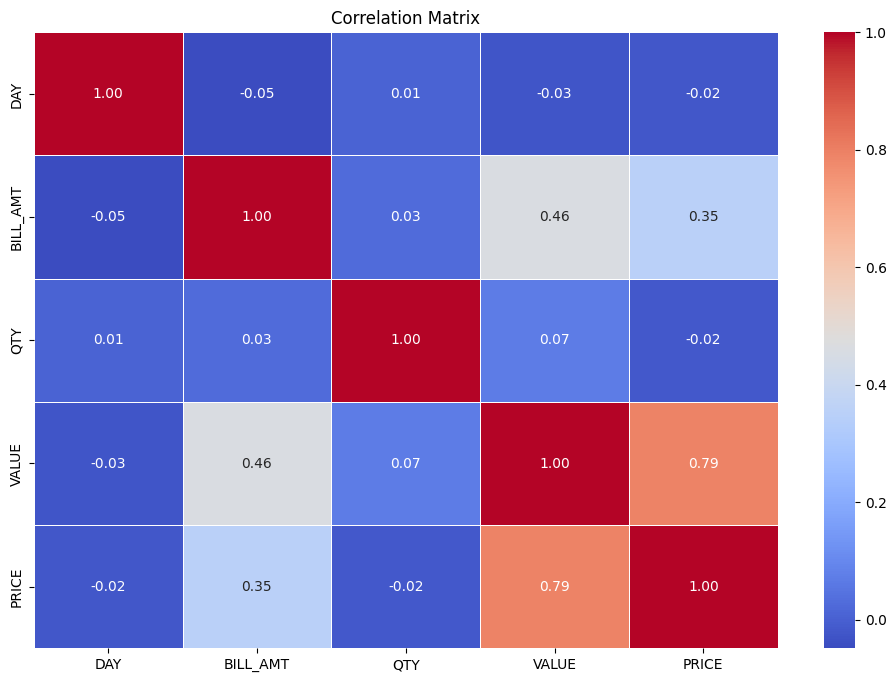

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = working_data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

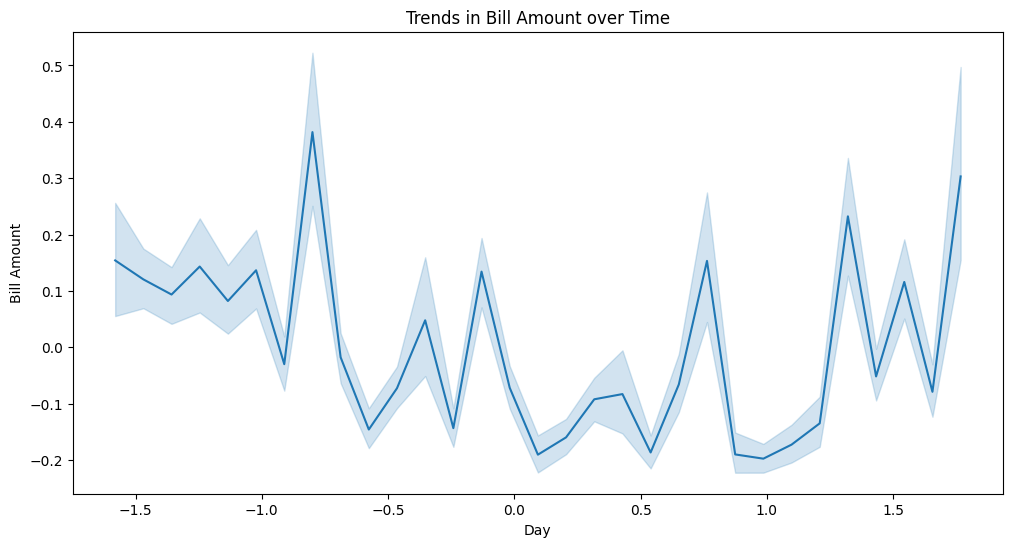

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=working_data_scaled, x='DAY', y='BILL_AMT')
plt.title('Trends in Bill Amount over Time')
plt.xlabel('Day')
plt.ylabel('Bill Amount')
plt.show()

<ipython-input-25-e1f326af7666>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ideal_data, y='GRP', order=ideal_data['GRP'].value_counts().index, palette='pastel')


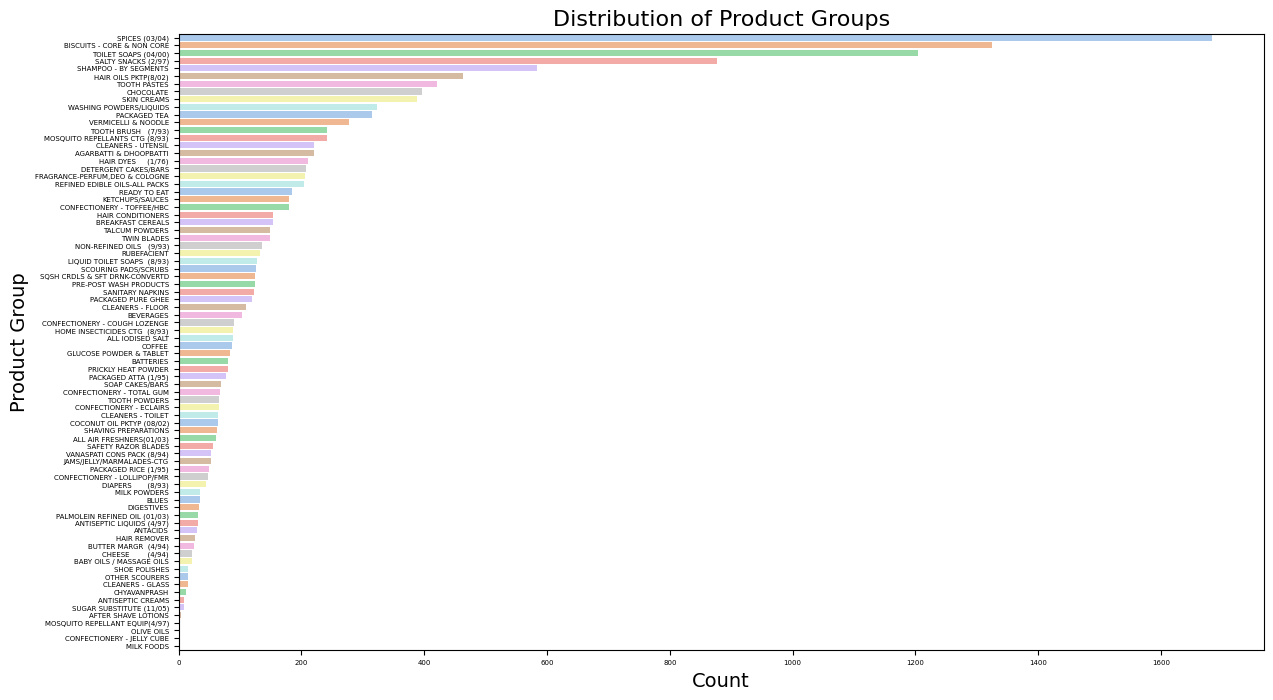

In [ ]:
plt.figure(figsize=(14, 8))  # Increase the size of the chart
sns.countplot(data=ideal_data, y='GRP', order=ideal_data['GRP'].value_counts().index, palette='pastel')
plt.title('Distribution of Product Groups', fontsize=16)  # Increase the title font size
plt.xlabel('Count', fontsize=14)  # Increase the x-axis label font size
plt.ylabel('Product Group', fontsize=14)  # Increase the y-axis label font size
plt.xticks(fontsize=5)  # Decrease the tick label font size
plt.yticks(fontsize=5)  # Decrease the tick label font size
plt.show()

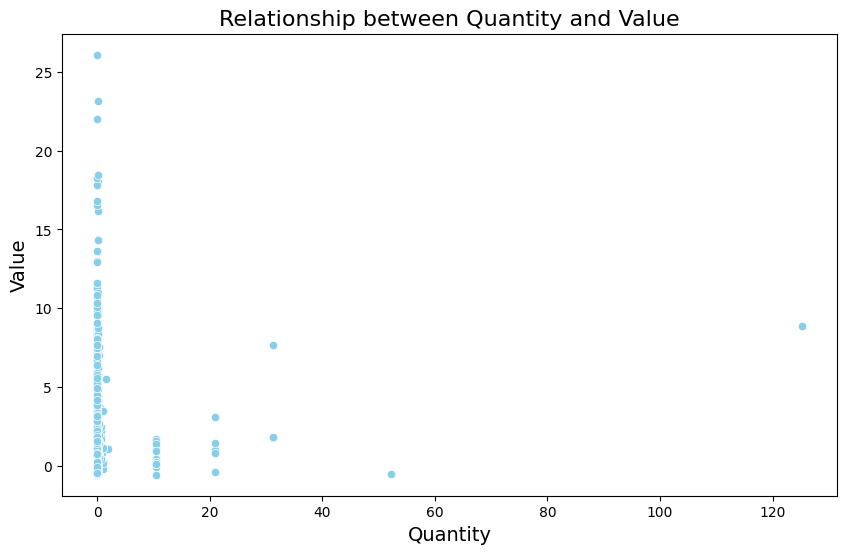

<ipython-input-26-9c33392cb2e7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ideal_data, x='MONTH', y='VALUE', palette='pastel')


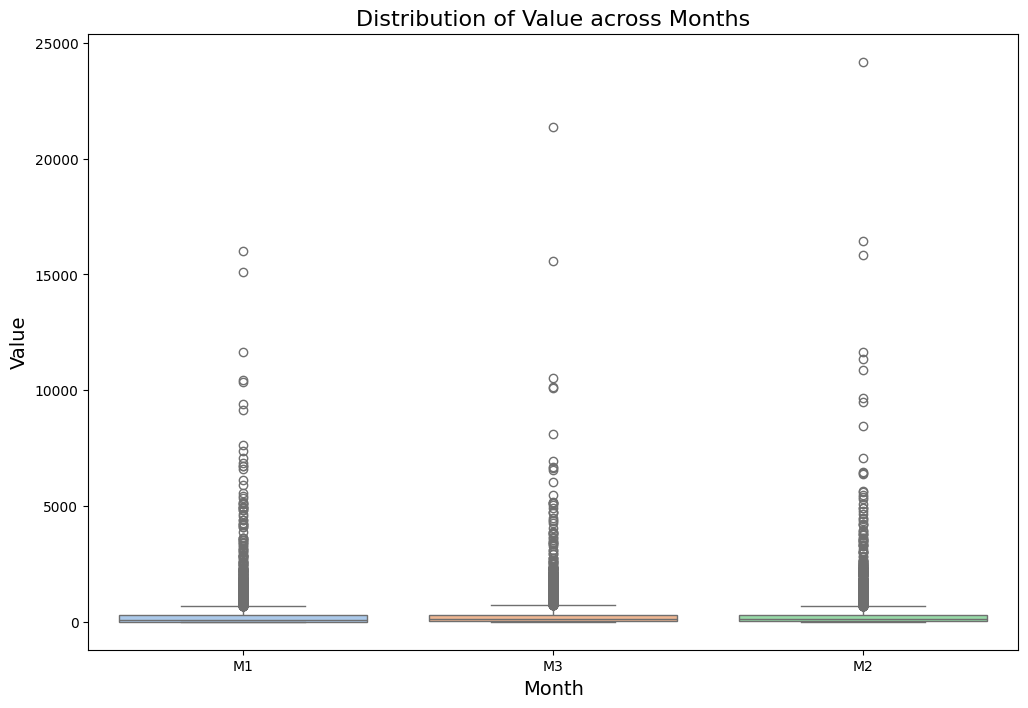

In [ ]:
# Scatter plot to explore the relationship between two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=working_data_scaled, x='QTY', y='VALUE', color='skyblue')
plt.title('Relationship between Quantity and Value', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

# Box plot to visualize the distribution of a numerical variable across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=ideal_data, x='MONTH', y='VALUE', palette='pastel')
plt.title('Distribution of Value across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten

# Assuming you have loaded the scaled data into a DataFrame named 'working_data_scaled'

# Assuming the target variable is stored in the 'PRICE' column of your DataFrame
target_variable = working_data_scaled['PRICE']

# Splitting the data into features (X) and target variable (y)
X = working_data_scaled.drop(columns=['PRICE'])  # Exclude target variable from features
y = target_variable

# Reshape X for Conv1D input
X_cnn = X.values.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

# Define and compile the models
gru_model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
gru_model.compile(optimizer='adam', loss='mse')

lstm_model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
lstm_model.compile(optimizer='adam', loss='mse')

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(units=1)
])
cnn_model.compile(optimizer='adam', loss='mse')

# Train the models
gru_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
cnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the models
gru_loss = gru_model.evaluate(X_test, y_test)
lstm_loss = lstm_model.evaluate(X_test, y_test)
cnn_loss = cnn_model.evaluate(X_test, y_test)

# Print the evaluation results
print("GRU Model Loss:", gru_loss)
print("LSTM Model Loss:", lstm_loss)
print("CNN Model Loss:", cnn_loss)

Epoch 1/30
538/538 [==============================] - 5s 6ms/step - loss: 0.2731 - val_loss: 0.2924
Epoch 2/30
538/538 [==============================] - 2s 4ms/step - loss: 0.2144 - val_loss: 0.2933
Epoch 3/30
538/538 [==============================] - 4s 7ms/step - loss: 0.2072 - val_loss: 0.2868
Epoch 4/30
538/538 [==============================] - 2s 4ms/step - loss: 0.2043 - val_loss: 0.2940
Epoch 5/30
538/538 [==============================] - 2s 4ms/step - loss: 0.1996 - val_loss: 0.2917
Epoch 6/30
538/538 [==============================] - 2s 4ms/step - loss: 0.1943 - val_loss: 0.2868
Epoch 7/30
538/538 [==============================] - 3s 5ms/step - loss: 0.1895 - val_loss: 0.2840
Epoch 8/30
538/538 [==============================] - 3s 6ms/step - loss: 0.1838 - val_loss: 0.2668
Epoch 9/30
538/538 [==============================] - 2s 5ms/step - loss: 0.1734 - val_loss: 0.2612
Epoch 10/30
538/538 [==============================] - 2s 4ms/step - loss: 0.1595 - val_loss: 0.2464

169/169 [==============================] - 1s 3ms/step


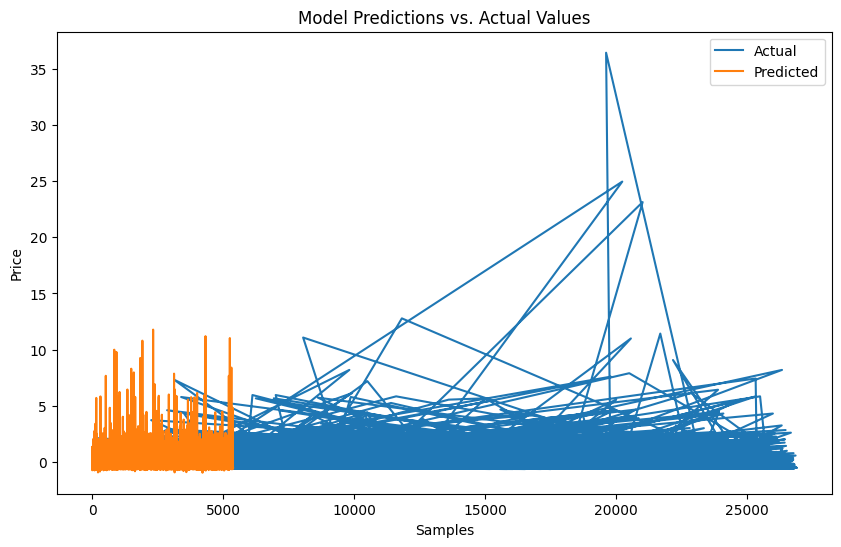

In [ ]:
y_pred = gru_model.predict(X_test)
y_true = y_test

# Visualize Model Outputs

plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()

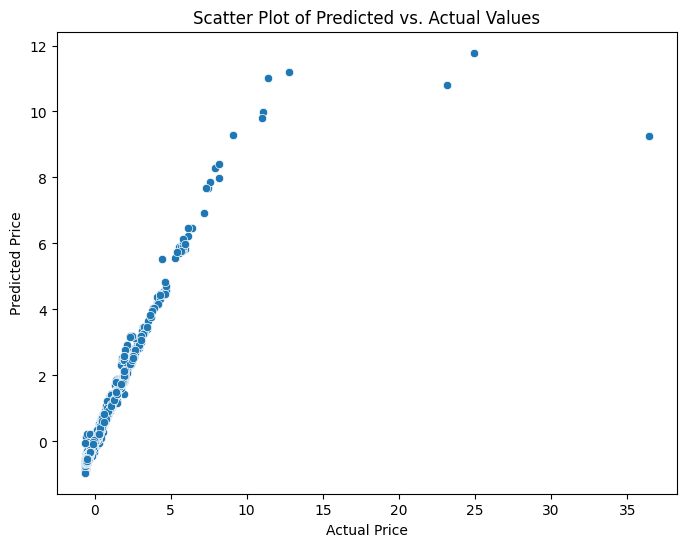

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true.values.flatten(), y=y_pred.flatten())
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

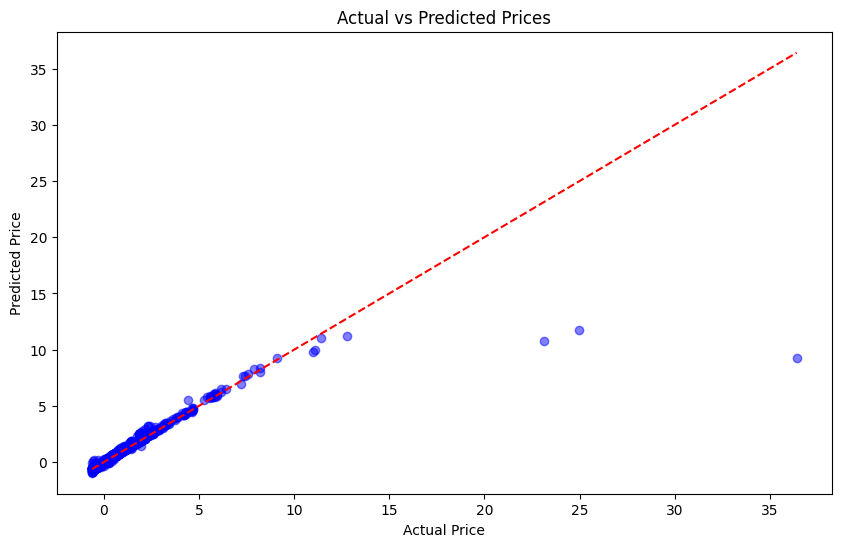

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Plotting the diagonal line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.245983,-0.099349,-0.032506,1.330044,2.023710
1,-1.245983,-0.339200,-0.032506,0.229519,0.495384
2,-1.245983,-0.496026,-0.032506,-0.490054,-0.503906
3,-1.245983,-0.315215,-0.032506,0.339572,0.648217
4,-1.245983,-0.479421,-0.032506,-0.413864,-0.398098


841/841 [==============================] - 2s 2ms/step
Root Mean Squared Error (RMSE): 0.23346380124867372


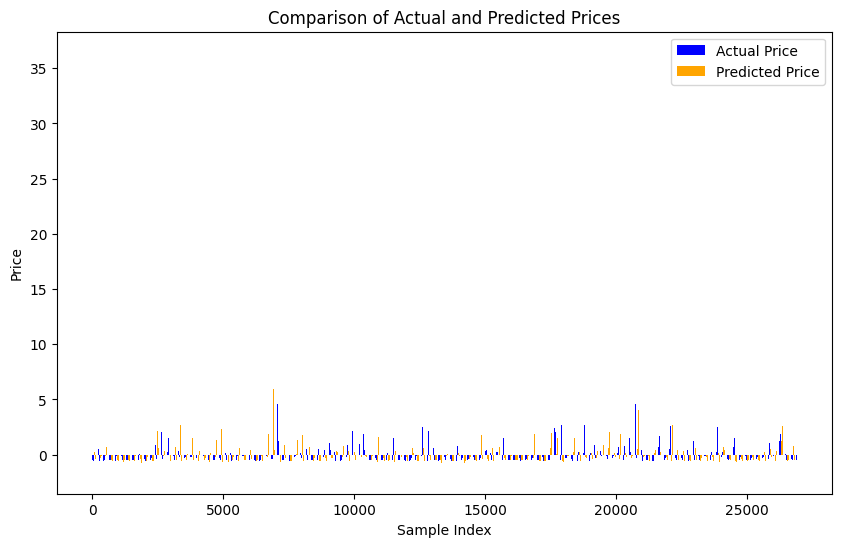

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Assuming 'working_data_scaled' contains your scaled dataset
df = working_data_scaled

# Assume 'X' contains the features used for prediction
X = df.drop(columns=['PRICE'])  # Exclude the target variable
y_true = df['PRICE']  # Actual prices from the dataset

# Load the trained model
model = gru_model # Replace 'your_model.h5' with the path to your trained model file

# Use the model to make predictions
y_pred = model.predict(X)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(10, 6))
bar_width = 0.35  # Define the bar width
plt.bar(np.arange(len(y_true)), y_true, width=bar_width, label='Actual Price', color='blue')
plt.bar(np.arange(len(y_pred)) + bar_width, y_pred.flatten(), width=bar_width, label='Predicted Price', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()

In [ ]:
validation_data=pd.read_csv("/content/Hackathon_Validation_Data.csv")
validation_data.head()

,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


In [ ]:
df=working_data_scaled
X = df.drop(columns=['PRICE'])  # Exclude the target variable
y_true = df['PRICE']  # Actual prices from the dataset
y_pred = gru_model.predict(X)
print("Shape of y_pred:", y_pred.shape)

841/841 [==============================] - 2s 2ms/step
Shape of y_pred: (26895, 1)


In [ ]:
print("Shape of ID column:", validation_data['ID'].shape)

# Check the shape of y_pred
print("Shape of y_pred:", y_pred.shape)

Shape of ID column: (2430,)
Shape of y_pred: (26895, 1)


In [ ]:
# Filter y_pred based on the length of validate_df['ID']
y_pred_filtered = y_pred[:len(validation_data['ID'])]

# Convert predictions to integers and ensure non-negativity
y_pred_int = np.round(y_pred_filtered).astype(int)
y_pred_int[y_pred_int < 0] = 0
submission_df = pd.DataFrame({'ID': validation_data['ID'], 'TOTALVALUE': y_pred_int.flatten()})

In [ ]:
submission_df.head()

,ID,TOTALVALUE
0,1112535,2
1,1112539,0
2,1112543,0
3,1112547,1
4,1112551,0


In [ ]:
submission_df.to_csv('submission.csv', index=False)
print("DONE!!")

DONE!!
